# Image Colorization using Convolution Neural Network

## Importing necessary libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Prototxt: This file consists of CNN network architechure
#### Caffe model: This is a model that is trained over 1.3million images from imagenet dataset.It can be used to predict unseen data
#### Npy is a numpy file that stores cluster center points in numpy format.

In [9]:
# Name of testing image
image = 'image5099.jpg'
# Path of our caffemodel, prototxt, and numpy files
prototxt = "models/colorization_deploy_v2.prototxt"
caffe_model = "models/colorization_release_v2.caffemodel"
pts_npy = "models/pts_in_hull.npy"
test_image =  "inputs/samples/"+image

#### Loading our Caffe Model into the memory

In [3]:
# Loading our model
net = cv2.dnn.readNetFromCaffe(prototxt, caffe_model)
pts = np.load(pts_npy)

### Top layer of the CNN architechure

In [4]:
 
layer1 = net.getLayerId("class8_ab")
print(layer1)

55


### Bottom Layer of the CNN architechure

In [5]:
layer2 = net.getLayerId("conv8_313_rh")
print(layer2)

53


#### Next, we load quantized bin centers. We then assign 1×1 kernels corresponding to each of the 313 bin centers and assign them to the corresponding layer in the network. Finally, we add a scaling layer with a non-zero value.

In [10]:
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype("float32")]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype="float32")]

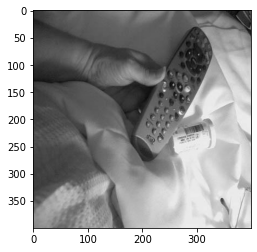

In [11]:
# Read image from the path
test_image = cv2.imread(test_image)
# Check image using matplotlib
plt.imshow(test_image)
plt.show()

In [12]:
#2 Convert image into gray scale
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# Convert image from gray scale to RGB format
test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)

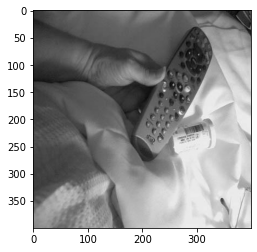

In [13]:
# Check image using matplotlib
plt.imshow(test_image)
plt.show()

In [14]:
# Converting the RGB image into LAB format
# Normalizing the image
normalized = test_image.astype("float32") / 255.0

In [15]:
# Converting the image into LAB
lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)

In [16]:
# Resizing the image
resized = cv2.resize(lab_image, (224, 224))

In [17]:
# 3Extracting the value of L for LAB image
L = cv2.split(resized)[0]
L -= 50   # OR we can write L = L - 50

In [18]:
# Predicting a and b values
# Setting input
net.setInput(cv2.dnn.blobFromImage(L))
# Finding the values of 'a' and 'b'
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

### Resizing a,b values into shape of our input image

In [19]:
# Resizing
ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))

In [20]:
# Taking the L value
L = cv2.split(lab_image)[0]

### Mergin L,a,b to create Lab Image

In [21]:
# Combining L,a,b
LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


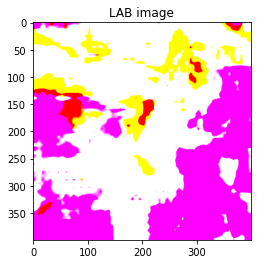

In [22]:
# Checking the LAB image
plt.imshow(LAB_colored)
plt.title('LAB image')
plt.show()

In [23]:
##4 Converting LAB image to RGB
RGB_colored = cv2.cvtColor(LAB_colored,cv2.COLOR_LAB2RGB)

### Clipping any pixel intensities that fall outside the range [0, 1] .

In [24]:

# Limits the values in array
RGB_colored = np.clip(RGB_colored, 0, 1)

#### Changing the pixel intensity back to [0,255],as we did scaling during pre-processing and converted the pixel intensity to [0,1]


In [25]:

RGB_colored = (255 * RGB_colored).astype("uint8")

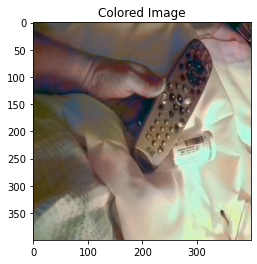

In [26]:
# Checking the image
plt.imshow(RGB_colored)
plt.title('Colored Image')
plt.show()

In [27]:

# Saving the colored image
# Converting RGB to BGR
RGB_BGR = cv2.cvtColor(RGB_colored, cv2.COLOR_RGB2BGR)
# Saving the image in desired path
cv2.imwrite("output/"+image, RGB_BGR)

True